In [40]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import pickle

In [13]:
# Load data
data = pd.read_csv('human_glycolysis.tsv', sep = '\t')
data.head()

,Entry,STRING
0,O14556,9606.ENSP00000222286;
1,P00558,9606.ENSP00000362413;
2,P04075,9606.ENSP00000496166;
3,P04406,9606.ENSP00000380070;
4,P05062,9606.ENSP00000497767;


In [10]:
# Extract list of Entry names
entry_names = pd.DataFrame(data['Entry'].values, columns = ['entry'])
# Save data
entry_names.to_csv('entry_names.txt', header = False, index = False)
entry_names.head()

,entry
0,O14556
1,P00558
2,P04075
3,P04406
4,P05062


In [3]:
# Load mitosis network
mitosis = pd.read_csv('string_interactions.tsv', sep = '\t')
mitosis.head()

,#node1,node2,node1_string_id,node2_string_id,neighborhood_on_chromosome,gene_fusion,phylogenetic_cooccurrence,homology,coexpression,experimentally_determined_interaction,database_annotated,automated_textmining,combined_score
0,ABRAXAS2,RBBP8,9606.ENSP00000298492,9606.ENSP00000382628,0.0,0.0,0.0,0.0,0.058,0.041,0.0,0.567,0.575
1,ABRAXAS2,BRCC3,9606.ENSP00000298492,9606.ENSP00000358474,0.0,0.0,0.0,0.0,0.101,0.991,0.9,0.992,0.999
2,ABRAXAS2,BABAM2,9606.ENSP00000298492,9606.ENSP00000343412,0.0,0.0,0.0,0.0,0.098,0.987,0.9,0.993,0.999
3,ABRAXAS2,BABAM1,9606.ENSP00000298492,9606.ENSP00000352408,0.0,0.0,0.0,0.0,0.067,0.977,0.9,0.992,0.999
4,ACTR8,RUVBL1,9606.ENSP00000336842,9606.ENSP00000318297,0.0,0.0,0.0,0.0,0.044,0.916,0.9,0.821,0.998


In [4]:
# Isolate node1/node2 columns and weight
network = mitosis[['#node1', 'node2', 'combined_score']]
network.head()

,#node1,node2,combined_score
0,ABRAXAS2,RBBP8,0.575
1,ABRAXAS2,BRCC3,0.999
2,ABRAXAS2,BABAM2,0.999
3,ABRAXAS2,BABAM1,0.999
4,ACTR8,RUVBL1,0.998


In [5]:
# Rename columns
old_names = network.columns
new_names = ['source', 'target', 'weight']

for old, new in zip(old_names, new_names):
    network.rename(columns = {old : new}, inplace = True)

network.head()

C:\Users\roman\AppData\Local\Temp\ipykernel_30756\3756901942.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  network.rename(columns = {old : new}, inplace = True)


,source,target,weight
0,ABRAXAS2,RBBP8,0.575
1,ABRAXAS2,BRCC3,0.999
2,ABRAXAS2,BABAM2,0.999
3,ABRAXAS2,BABAM1,0.999
4,ACTR8,RUVBL1,0.998


In [42]:
# Load annotations
annotations = pd.read_csv('string_protein_annotations.tsv', sep = '\t')
annotations.head()

,#node,identifier,domain_summary_url,annotation,other_names_and_aliases
0,ABRAXAS2,9606.ENSP00000298492,BRISC complex subunit Abraxas 2; Component of ...,http://smart.embl.de/smart/DDvec.cgi?smart=415:,"23172,6H3C,6R8F,AAH08999.2,ABRAXAS2,ABRAXAS2-2..."
1,ACTR8,9606.ENSP00000336842,Actin-related protein 8; Plays an important ro...,https://smart.embl.de/smart/DDvec.cgi?smart=62...,"4FO0,93973,AAH32744.1,AC012467,ACTR8,ACTR8-201..."
2,ANAPC1,9606.ENSP00000339109,Anaphase-promoting complex subunit 1; Componen...,https://smart.embl.de/smart/DDvec.cgi?smart=19...,"4UI9,5A31,5G04,5G05,5KHR,5KHU,5L9T,5L9U,5LCW,5..."
3,ANAPC10,9606.ENSP00000478501,Anaphase-promoting complex subunit 10; Compone...,https://smart.embl.de/smart/DDvec.cgi?smart=18...,"10393,1JHJ,4UI9,5A31,5G04,5G05,5KHR,5KHU,5L9T,..."
4,ANAPC11,9606.ENSP00000349957,Anaphase-promoting complex subunit 11; Togethe...,https://smart.embl.de/smart/DDvec.cgi?smart=19...,"2MT5,4R2Y,4UI9,51529,5A31,5G04,5G05,5JG6,5KHR,..."


In [43]:
# Split annotation into protein name and brief description
expanded_name = annotations['domain_summary_url'].str.split(';', expand = True)
expanded_name.head()

,0,1,2,3,4
0,BRISC complex subunit Abraxas 2,"Component of the BRISC complex, a multiprotei...",None,None,None
1,Actin-related protein 8,Plays an important role in the functional org...,Belongs to the actin family. ARP8 subfamily.,None,None
2,Anaphase-promoting complex subunit 1,Component of the anaphase promoting complex/c...,None,None,None
3,Anaphase-promoting complex subunit 10,Component of the anaphase promoting complex/c...,None,None,None
4,Anaphase-promoting complex subunit 11,"Together with the cullin protein ANAPC2, cons...",None,None,None


In [44]:
# Split column 1 on full stop for brief explanation
expanded_desc = expanded_name[1].str.split('.', expand = True)
expanded_desc.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,"Component of the BRISC complex, a multiprotei...",May act as a central scaffold protein that as...,Plays a role in regulating the onset of apopt...,Required for normal mitotic spindle assembly ...,,,],None,None,None,None,None,None
1,Plays an important role in the functional org...,"Exhibits low basal ATPase activity, and unabl...",None,None,None,None,None,None,None,None,None,None,None
2,Component of the anaphase promoting complex/c...,The APC/C complex acts by mediating ubiquitin...,Belongs to the APC1 family,,None,None,None,None,None,None,None,None,None
3,Component of the anaphase promoting complex/c...,The APC/C complex acts by mediating ubiquitin...,,None,None,None,None,None,None,None,None,None,None
4,"Together with the cullin protein ANAPC2, cons...",The APC/C complex acts by mediating ubiquitin...,May recruit the E2 ubiquitin-conjugati [,,,],None,None,None,None,None,None,None


In [69]:
# Combine `#node1`, expanded name, and expanded desc
plot_annot = pd.DataFrame({'node_id' : annotations['#node'],
                           'node_name' : expanded_name[0],
                           'node_desc' : expanded_desc[0]})
# Strip node_name and node_desc columns
for col in ['node_name', 'node_desc']:
    plot_annot[col] = plot_annot[col].str.strip()
plot_annot.head()

,node_id,node_name,node_desc
0,ABRAXAS2,BRISC complex subunit Abraxas 2,"Component of the BRISC complex, a multiprotein..."
1,ACTR8,Actin-related protein 8,Plays an important role in the functional orga...
2,ANAPC1,Anaphase-promoting complex subunit 1,Component of the anaphase promoting complex/cy...
3,ANAPC10,Anaphase-promoting complex subunit 10,Component of the anaphase promoting complex/cy...
4,ANAPC11,Anaphase-promoting complex subunit 11,"Together with the cullin protein ANAPC2, const..."


In [70]:
# Generate networkx object
graph = nx.from_pandas_edgelist(network, source = 'source', target = 'target', edge_attr = 'weight')
print('Graph object created')

Graph object created


In [71]:
# Convert plot_annot to dictionary
plot_annot_dict = plot_annot.set_index('node_id').to_dict(orient = 'index')
# Set node attributes
nx.set_node_attributes(graph, plot_annot_dict)
print('Node annotations set as attributes')

Node annotations set as attributes


In [56]:
# Remove orphans
print(len(graph.nodes))
# Find all connected components and get the largest one
largest_cc = max(nx.connected_components(graph), key=len)
# Create a subgraph with only the largest connected component
graph_largest = graph.subgraph(largest_cc).copy()
print(len(graph_largest.nodes))

264
262


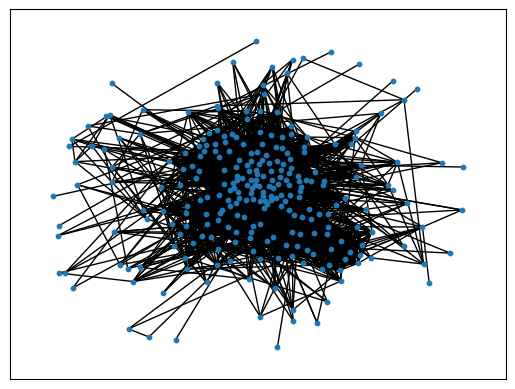

In [38]:
# Get positional data
pos = nx.spring_layout(graph_largest, k = 0.5, weight = 'weight')
# Draw
nx.draw_networkx_edges(graph_largest, pos = pos)
nx.draw_networkx_nodes(graph_largest, pos = pos, node_size = 10)

In [72]:
# Save as pickle file
with open('assets/graphs/mitosis.pickle', 'wb') as f:
    pickle.dump(graph, f)

In [73]:
graph.nodes['ACTR8']

{'node_name': 'Actin-related protein 8',
 'node_desc': 'Plays an important role in the functional organization of mitotic chromosomes'}

# 9 Node Graph

In [90]:
# GENERATE 9 NODE GRAPH FOR 'FIFTH'
nine_node_graph = nx.powerlaw_cluster_graph(9, 2, 0.3)
#nine_node_graph = nx.watts_strogatz_graph(n = 9, k = 2, p = 0.15)
# Generate positional data
pos = nx.spring_layout(nine_node_graph, k = 0.5)

# Pickle graph
with open('assets/graphs/nine_node.pickle', 'wb') as f:
    pickle.dump(nine_node_graph, f)

# Pickle positional data
with open('assets/graphs/nine_node_pos.pickle', 'wb') as f:
    pickle.dump(pos, f)

# Host Pathway Network

1


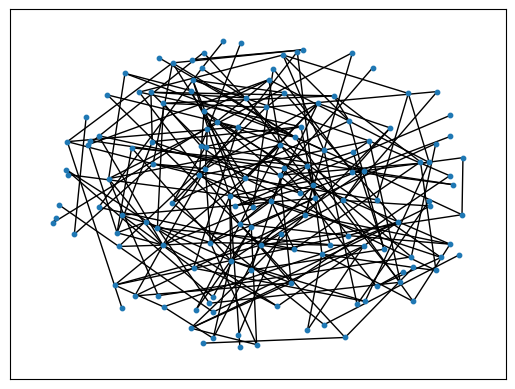

In [129]:
import networkx as nx
import random

def generate_graph_with_pathways(num_nodes=150, pathways=['Transport', 'Metabolism', 'DNA', 'Cell Division', 'Immune System', 'Apoptosis'], max_pathway_size=40):
    # Initialize graph
    graph = nx.Graph()
    
    # Add nodes with pathway attributes
    for node in range(num_nodes):
        # Initialize each pathway attribute as 0
        pathway_attributes = {pathway: 0 for pathway in pathways}
        graph.add_node(node, **pathway_attributes)
    
    # Define pathways and ensure they form connected subgraphs
    for pathway in pathways:
        # Randomly select nodes for this pathway, limiting to max_pathway_size
        pathway_nodes = random.sample(range(num_nodes), random.randint(10, max_pathway_size))
        
        # Connect the selected nodes into a single connected component (e.g., as a random tree)
        for i in range(1, len(pathway_nodes)):
            graph.add_edge(pathway_nodes[i - 1], pathway_nodes[i])
        
        # Mark each node in this pathway with a 1 for the pathway attribute
        for node in pathway_nodes:
            graph.nodes[node][pathway] = 1
        
        # Ensure all pathway nodes are part of a connected component within the pathway
        for i in range(len(pathway_nodes) - 1):
            if not nx.has_path(graph, pathway_nodes[i], pathway_nodes[i + 1]):
                graph.add_edge(pathway_nodes[i], pathway_nodes[i + 1])

    # Add more random connections to create an interconnected network
    additional_edges = num_nodes  # Adjust for network density
    for _ in range(additional_edges):
        u, v = random.sample(range(num_nodes), 2)
        if not graph.has_edge(u, v):
            graph.add_edge(u, v)

    ## CHECKS
    # Remove isolates
    graph.remove_nodes_from(list(nx.isolates(graph)))
    # Check num_connected_components
    num_comp = nx.number_connected_components(graph)
    print(num_comp)
    
    return graph

# Generate the scaled graph
pathway_graph = generate_graph_with_pathways()

# To check the graph structure, we can inspect nodes and attributes
# for node in graph.nodes(data=True):
#     print(node)

# Get positional data
pathway_pos = nx.spring_layout(pathway_graph, k = 0.75, weight = 'weight')

# Pickle graph
with open('assets/graphs/pathway_graph.pickle', 'wb') as f:
    pickle.dump(pathway_graph, f)

# Pickle positional data
with open('assets/graphs/pathway_pos.pickle', 'wb') as f:
    pickle.dump(pathway_pos, f)

# Draw
nx.draw_networkx_edges(pathway_graph, pos = pathway_pos)
nx.draw_networkx_nodes(pathway_graph, pos = pathway_pos, node_size = 10)    

In [ ]:
# Get positional data
pathway_pos = nx.spring_layout(pathway_graph, k = 0.5, weight = 'weight')

# Pickle graph
with open('assets/graphs/pathway_graph.pickle', 'wb') as f:
    pickle.dump(pathway_graph, f)

# Pickle positional data
with open('assets/graphs/pathway_pos.pickle', 'wb') as f:
    pickle.dump(pathway_pos, f)

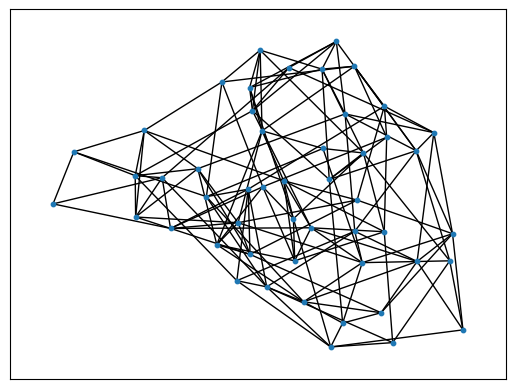

In [106]:
# Get positional data
pathway_pos = nx.spring_layout(pathway_graph, k = 0.5, weight = 'weight')
# Draw
nx.draw_networkx_edges(pathway_graph, pos = pathway_pos)
nx.draw_networkx_nodes(pathway_graph, pos = pathway_pos, node_size = 10)

# Drug effect network

1


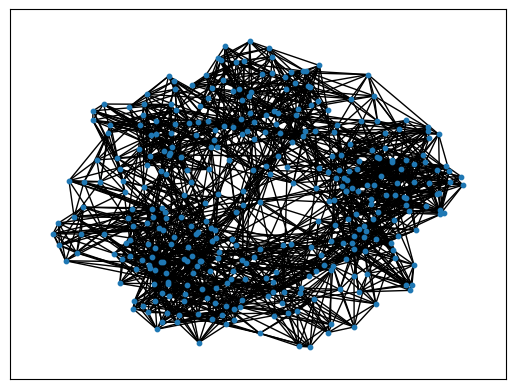

In [155]:
import networkx as nx
import community as community_louvain
import numpy as np
import random
from collections import defaultdict

def create_louvain_clusters(G, min_cluster_size_ratio=0.05):
    # Detect clusters
    partition = community_louvain.best_partition(G)
    
    # Convert partition to clusters
    clusters = defaultdict(list)
    for node, cluster_id in partition.items():
        clusters[cluster_id].append(node)
    
    # Remove small clusters and merge them with larger clusters
    min_cluster_size = max(int(len(G) * min_cluster_size_ratio), 1)
    large_clusters = {k: v for k, v in clusters.items() if len(v) >= min_cluster_size}
    small_clusters = {k: v for k, v in clusters.items() if len(v) < min_cluster_size}
    
    # Merging small clusters into large clusters
    for small_cluster_nodes in small_clusters.values():
        # Choose a large cluster to merge into
        large_cluster = random.choice(list(large_clusters.keys()))
        large_clusters[large_cluster].extend(small_cluster_nodes)
    
    # Flatten merged clusters
    merged_clusters = {}
    for i, nodes in enumerate(large_clusters.values()):
        for node in nodes:
            merged_clusters[node] = i
            
    return merged_clusters

def assign_drug_associations(merged_clusters, num_drugs=4, max_drug_ratio=0.5, min_combo_ratio=0.9):
    # Initialize drug association per cluster
    cluster_drug_map = {}
    clusters = set(merged_clusters.values())
    
    # Distribute drug associations
    num_nodes = len(merged_clusters)
    max_drug_nodes = int(num_nodes * max_drug_ratio)
    total_assigned = 0
    
    # Ensure each cluster has unique drug associations with the required distribution
    while total_assigned < int(num_nodes * min_combo_ratio):
        for cluster_id in clusters:
            # Choose random drugs for this cluster
            drugs = np.random.choice([0, 1], size=num_drugs, p=[0.7, 0.3]) # Random assignment
            cluster_drug_map[cluster_id] = [int(d) for d in drugs]  # Convert np.int64 to int
            total_assigned += sum(drugs)
    
    return cluster_drug_map


def build_graph_with_attributes(n):
    # Create a random graph
    #G = nx.erdos_renyi_graph(n, 0.05)
    G = nx.watts_strogatz_graph(n, k = 10, p = 0.05)

    ## CHECKS
    # Remove isolates
    G.remove_nodes_from(list(nx.isolates(G)))
    # Check num_connected_components
    num_comp = nx.number_connected_components(G)
    print(num_comp)

    
    # Step 1: Louvain clustering and merging small clusters
    merged_clusters = create_louvain_clusters(G)
    
    # Step 2: Assign drugs to clusters
    cluster_drug_map = assign_drug_associations(merged_clusters)
    
    # Step 3: Assign node attributes
    for node in G.nodes:
        cluster_id = merged_clusters[node]
        drugs = cluster_drug_map[cluster_id]
        
        # Node attributes
        G.nodes[node]['disease'] = random.uniform(0, 1)
        G.nodes[node]['cluster'] = cluster_id
        
        # Assign binary drug attributes as integers
        for i in range(len(drugs)):
            G.nodes[node][f'Drug {i+1}'] = drugs[i]
    
    return G

# Run the function with an example node count
n = 350
drug_effect_graph = build_graph_with_attributes(n)
# Get positional data
drug_effect_pos = nx.spring_layout(drug_effect_graph, k = 0.4)

# Pickle graph
with open('assets/graphs/drug_effect_graph.pickle', 'wb') as f:
    pickle.dump(drug_effect_graph, f)

# Pickle positional data
with open('assets/graphs/drug_effect_pos.pickle', 'wb') as f:
    pickle.dump(drug_effect_pos, f)

# Draw
nx.draw_networkx_edges(drug_effect_graph, pos = drug_effect_pos)
nx.draw_networkx_nodes(drug_effect_graph, pos = drug_effect_pos, node_size = 10)

In [159]:
drug_effect_graph.nodes[0]

{'disease': 0.9755824963837264,
 'cluster': 0,
 'Drug 1': 1,
 'Drug 2': 0,
 'Drug 3': 1,
 'Drug 4': 0}

In [ ]:
    G = nx.watts_strogatz_graph(n, k = 10, p = 0.05)

    ## CHECKS
    # Remove isolates
    G.remove_nodes_from(list(nx.isolates(G)))
    # Check num_connected_components
    num_comp = nx.number_connected_components(G)
    print(num_comp)